<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#基本指标" data-toc-modified-id="基本指标-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>基本指标</a></span></li><li><span><a href="#相关性" data-toc-modified-id="相关性-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>相关性</a></span></li><li><span><a href="#柱状图" data-toc-modified-id="柱状图-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>柱状图</a></span></li><li><span><a href="#计数" data-toc-modified-id="计数-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>计数</a></span></li><li><span><a href="#随机生成器" data-toc-modified-id="随机生成器-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>随机生成器</a></span><ul class="toc-item"><li><span><a href="#Generator" data-toc-modified-id="Generator-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generator</a></span></li><li><span><a href="#并行" data-toc-modified-id="并行-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>并行</a></span></li><li><span><a href="#多线程" data-toc-modified-id="多线程-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>多线程</a></span></li><li><span><a href="#性能" data-toc-modified-id="性能-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>性能</a></span></li><li><span><a href="#整数随机序列" data-toc-modified-id="整数随机序列-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>整数随机序列</a></span></li><li><span><a href="#均匀随机序列" data-toc-modified-id="均匀随机序列-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>均匀随机序列</a></span></li><li><span><a href="#随机采样" data-toc-modified-id="随机采样-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>随机采样</a></span></li></ul></li><li><span><a href="#随机排列" data-toc-modified-id="随机排列-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>随机排列</a></span></li><li><span><a href="#随机分布" data-toc-modified-id="随机分布-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>随机分布</a></span><ul class="toc-item"><li><span><a href="#高斯相关" data-toc-modified-id="高斯相关-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>高斯相关</a></span></li><li><span><a href="#离散分布" data-toc-modified-id="离散分布-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>离散分布</a></span></li><li><span><a href="#指对数相关" data-toc-modified-id="指对数相关-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>指对数相关</a></span></li><li><span><a href="#检验相关" data-toc-modified-id="检验相关-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>检验相关</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>小结</a></span></li><li><span><a href="#参考" data-toc-modified-id="参考-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>参考</a></span></li></ul></div>

In [4]:
import numpy as np
np.__version__

'1.22.3'

文档阅读说明：

- 🐧 表示 Tip
- ⚠️ 表示注意事项

有一部分常用的基础API在《从小白到入门》中已经做了介绍，此处不再赘述。

## 基本指标

主要是均值、中位、方差和标准差——支持非值（NaN）的情况。

In [19]:
a = np.array([
    [1, 2, 3, 4],
    [5, np.nan, np.nan, 6],
    [7, 8, np.nan, 9]
])
a

array([[ 1.,  2.,  3.,  4.],
       [ 5., nan, nan,  6.],
       [ 7.,  8., nan,  9.]])

均值：

In [20]:
np.average(a)

nan

In [21]:
np.nanmean(a)

5.0

In [24]:
np.mean(a, axis=0)

array([4.33333333,        nan,        nan, 6.33333333])

In [25]:
np.nanmean(a, axis=0), 13/3, 10/2, 3/1, 19/3

(array([4.33333333, 5.        , 3.        , 6.33333333]),
 4.333333333333333,
 5.0,
 3.0,
 6.333333333333333)

中位：

In [27]:
np.median(a)

nan

In [26]:
np.nanmedian(a)

5.0

标准差：

In [29]:
np.nanstd(a)

2.581988897471611

In [31]:
np.nanvar(a, axis=1)

array([1.25      , 0.25      , 0.66666667])

分位数：

In [34]:
a

array([[ 1.,  2.,  3.,  4.],
       [ 5., nan, nan,  6.],
       [ 7.,  8., nan,  9.]])

In [36]:
np.percentile(a, 25)

nan

In [39]:
# 百分位
np.nanpercentile(a, 25)

3.0

In [42]:
# 分位数
np.nanquantile(a, 0.25)

3.0

In [46]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [48]:
# 极值
np.ptp(a)

11

In [49]:
np.ptp(a, axis=0)

array([8, 8, 8, 8])

In [50]:
np.ptp(a, axis=1)

array([3, 3, 3])

## 相关性

`correlate`计算两个一维数组的互相关性，参数：

- 数组：a，v
- mode：valid、same或full，默认valid，与ch04的《卷积》中的mode含义相同。

In [98]:
a = np.array([1,2,3])
b = np.array([4,5,6])

In [68]:
np.correlate(a, b), np.sum(a * np.conj(b))

(array([32]), 32)

In [73]:
np.correlate(a, b, "same")

array([17, 32, 23])

In [99]:
(
    np.sum(np.array([0,1,2])*np.array([4,5,6])),
    np.sum(np.array([1,2,3])*np.array([4,5,6])),
    np.sum(np.array([2,3,0])*np.array([4,5,6])),
)

(17, 32, 23)

In [100]:
np.correlate(a, b, "full")

array([ 6, 17, 32, 23, 12])

In [101]:
(
    np.sum(np.array([0,0,1])*np.array([4,5,6])),
    np.sum(np.array([0,1,2])*np.array([4,5,6])),
    np.sum(np.array([1,2,3])*np.array([4,5,6])),
    np.sum(np.array([2,3,0])*np.array([4,5,6])),
    np.sum(np.array([3,0,0])*np.array([4,5,6])),
)

(6, 17, 32, 23, 12)

`corrcoef`是皮尔逊相关系数，参数：

- 数组
- rowvar：默认True。为True时，每一行表示一个变量，为False时，每一列表示一个变量。

公式：

$$
R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }
$$

In [120]:
a * b /np.sqrt((a*a) * (b*b))

array([1., 1., 1.])

In [121]:
np.corrcoef(a,b)

array([[1., 1.],
       [1., 1.]])

`cov`是协方差矩阵，参数包括：

- 数组
- rowvar：布尔值，同`corrcoef`。
- bias：布尔值，默认False，归一值为N-1，N为观测数量；为True时，归一值为N。会被ddof覆盖。
- ddof：`int`，可取1或0，为1时表示使用N-1（不管后面两个weights怎么设置），为0时使用N。
- fweights：频率权重，表示每个观测值重复的次数。
- aweights：观测向量权重，重要的相对权重较大，不重要的较小，如果ddof=0，可用于将概率分配给观察向量。


公式：
$$
\operatorname{cov}_{x, y}=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{N-1}
$$

其中u和v分别是X和Y的期望。

返回的矩阵中，`c[i][j]` 是`x[i]`和`x[j]`的协方差，`c[i][i]`则是`x{i]`的方差。

In [135]:
np.cov(a,b)

array([[1., 1.],
       [1., 1.]])

In [136]:
np.sum((a-np.average(a)) * (b-np.average(b)))/2

1.0

In [139]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
x

array([[0, 1, 2],
       [2, 1, 0]])

In [147]:
# 默认每一行是一个变量
# 对角线是方差，反对角线是协方差
np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

In [148]:
# [0-1, 1-1, 2-1] * [2-1, 1-1, 0-1] = -1 + 0 + -1 = -2 
# -2 / (3-1) = -1

In [166]:
# 再来一个例子
x = np.array([-2.1, -1,  4.3])
y = np.array([3,  1.1,  0.12])
X = np.stack((x, y), axis=0)
X

array([[-2.1 , -1.  ,  4.3 ],
       [ 3.  ,  1.1 ,  0.12]])

In [167]:
np.cov(X), np.cov(x, y)

(array([[11.71      , -4.286     ],
        [-4.286     ,  2.14413333]]),
 array([[11.71      , -4.286     ],
        [-4.286     ,  2.14413333]]))

In [168]:
np.cov(x), np.cov(y)

(array(11.71), array(2.14413333))

In [175]:
np.sum((x - np.average(x)) * (y - np.average(y))) / (3-1)

-4.2860000000000005

## 柱状图

柱状图其实是对不同数据分布的一种描述。

In [183]:
from collections import Counter

In [514]:
rng = np.random.default_rng(42)
a = rng.integers(0, 5, (3, 4))
a

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4]])

`histogram`接受几个参数：

- 数组，会打平
- bins：默认10，一个`int`或一组`int`或`str`，一个表示等距，一组表示单调递增的边缘数组，包括最右边的边缘，允许不均匀的bin宽度。`str`时参见下面的`histogram_bin_edges`接口。
- range：一个Tuple的浮点数，bin的上下界，不提供时默认为`(a.min(), a.max())`，超出的会被忽略，第一个元素必须小于第二个。
- weights：与a同样shape的一组数，如果`density=True`，会被归一化。
- density：布尔值，False时结果包含每个bin的样本数，True时结果为概率密度函数。

返回hist和bin边界。注意，除了最后一组边界，其他的都是「左闭右开」。

In [322]:
sa = sorted(Counter(a.flatten()).items())
sa

[(0, 3), (1, 1), (2, 3), (3, 3), (4, 2)]

In [323]:
# 注意：3个数其实是2个区间
np.histogram(a, bins=[0, 3, 5]), np.sum([v[1] for v in sa if v[0] < 3]), np.sum([v[1] for v in sa if v[0] >= 3])

((array([7, 5]), array([0, 3, 5])), 7, 5)

In [324]:
total = a.shape[0] * a.shape[1]
sa = [(v[0], v[1]/total) for v in sorted(Counter(a.flatten()).items())]
sa

[(0, 0.25),
 (1, 0.08333333333333333),
 (2, 0.25),
 (3, 0.25),
 (4, 0.16666666666666666)]

In [325]:
(
    np.histogram(a, bins=[0, 3, 5], density=True), 
    np.sum([v[1] for v in sa if v[0] < 3])/3, np.sum([v[1] for v in sa if v[0] >= 3])/2
)

((array([0.19444444, 0.20833333]), array([0, 3, 5])),
 0.19444444444444442,
 0.20833333333333331)

In [359]:
# 带权重的
np.histogram(a, bins=[0, 3, 5], weights=a,  density=True)

(array([0.09722222, 0.35416667]), array([0, 3, 5]))

In [360]:
a.flatten()

array([0, 3, 3, 2, 2, 4, 0, 3, 1, 0, 2, 4])

In [361]:
# 0个0，3个3 …… 4个4
b = [3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 1, 2, 2, 4, 4, 4, 4]

In [362]:
np.histogram(b, bins=[0,3,5], density=True)

(array([0.09722222, 0.35416667]), array([0, 3, 5]))

`histogram2d`是上个接口的二维版本，处理两组数组（一维的）。

- x,y：x和y一维数组
- bins：含义同上，但情况更多（不过不支持string），支持：
  - x和y共享：`int`, `array`
  - x和y分别：`[int,int]`, `[array, array]`
  - `int`表示bin的数量，`array`表示分组边界：`[int, array]`, `[array, int]`
- range：同上
- density：同上，默认False，返回每个bin的样本数，为True返回bin的概率密度
- weights：同上

如果x和y完全无交集，其实和分别算是一样的，但两者有交集是会在二维平面上统计。

In [515]:
a

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4]])

In [516]:
rng = np.random.default_rng(42)
c = rng.integers(5, 10, (3, 4))
c

array([[5, 8, 8, 7],
       [7, 9, 5, 8],
       [6, 5, 7, 9]])

In [517]:
rng = np.random.default_rng(42)
d = rng.integers(0, 5, (3, 4))
d

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4]])

In [573]:
Hac,xe,ye =np.histogram2d(a.flatten(), c.flatten(), bins=[[0,3,5],[5,9,10]])
Hac

array([[7., 0.],
       [3., 2.]])

In [581]:
(a.flatten() < 3).sum(), (a.flatten() >=3).sum(), 7+0, 3+2

(7, 5, 7, 5)

In [582]:
(c.flatten()<9).sum(), (c.flatten()>=9).sum(), 7+3, 0+2

(10, 2, 10, 2)

In [586]:
Had, xe,ye = np.histogram2d(a.flatten(), d.flatten(), bins=[[0,3,4], [0,2,4]])
Had

array([[4., 3.],
       [0., 5.]])

In [590]:
(a.flatten() < 3).sum(), (a.flatten() >=3).sum(), 4+3, 0+5

(7, 5, 7, 5)

In [591]:
(d.flatten()<2).sum(), (d.flatten()>=2).sum(), 4+0,3+5

(4, 8, 4, 8)

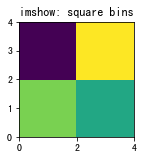

In [589]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(Had, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]])

`histogramdd`是多维版本，除了输入的数组外，其他参数与前面的基本一致。

In [596]:
rng = np.random.default_rng(42)
a = rng.integers(0, 10, (100, 3))

In [604]:
H, edges = np.histogramdd(a, bins=[5, 3, 4])

In [606]:
H.shape

(5, 3, 4)

In [605]:
edges

[array([0. , 1.8, 3.6, 5.4, 7.2, 9. ]),
 array([0., 3., 6., 9.]),
 array([0.  , 2.25, 4.5 , 6.75, 9.  ])]

`histogram_bin_edges`用来计算bin的边界，只算边界。

不过这里的bin参数支持string，这里定义了很多方法：

- auto：折中的方法获得不错的效果，小数据集一般会采用
- fd：Freedam Diaconis Estimator，大数据集一般会采用

$$
2 \frac {IQR} {\sqrt[3] {n}}
$$

- scott：与标准差成正比，与数据集size的立方根成反比，对小数据集过于保守，但是和大数据集。标准差对异常值不是很鲁棒。在没有异常值时，它的值和FD很相似。

$$
h = \sigma \sqrt[3]{\frac{24 * \sqrt{\pi}}{n}}
$$

- rice：bin的数量与数据集size的立方根成反比，它倾向于高估条柱的数量，并且没有考虑数据可变性。

$$
n_h = 2 n^{1/3}
$$

- sturges：数据集size的2为底对数，此估计器假定数据是正态的，对于较大的非正态数据集过于保守。R语言的`hist`的默认方法。

$$
n_h = \log_{2}{n} +1
$$

- doane：Sturges的改进版本，可为非正态数据集生成更好的估计值。此估计器尝试解释数据的偏斜。

$$
n_h = 1 + \log_{2}(n) + \log_{2} (1 + \frac {|g_1|} {\sigma_{g_1}}) \\
g_1 = mean[(\frac{x - \mu}{\sigma})^3]\\
\sigma_{g_1} = \sqrt{\frac{6(n - 2)}{(n + 1)(n + 3)}}
$$

- sqrt：最简单和快速的估计器，只考虑数据集大小。

$$
n_h = \sqrt n
$$

In [613]:
# 随机数本来就是0-9
np.histogram_bin_edges(a, bins=3)

array([0., 3., 6., 9.])

In [679]:
rng = np.random.default_rng(42)
a = rng.integers(0, 10, 500)

In [680]:
np.histogram_bin_edges(a, bins="auto")

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

`fd`：

In [681]:
IQR = np.percentile(a, 75) - np.percentile(a, 25)

In [709]:
2 * IQR / (a.size ** (1/3))

1.2599210498948732

In [683]:
np.histogram_bin_edges(a, bins="fd")

array([0.   , 1.125, 2.25 , 3.375, 4.5  , 5.625, 6.75 , 7.875, 9.   ])

`scott`:

In [685]:
np.histogram_bin_edges(a, bins="scott")

array([0.   , 1.125, 2.25 , 3.375, 4.5  , 5.625, 6.75 , 7.875, 9.   ])

In [708]:
(24*np.sqrt(np.pi)/a.size)**(1/3)* np.std(a)

1.2524886807479167

`rice`:

In [702]:
# 16个区间（柱子）
np.histogram_bin_edges(a, bins="rice").shape

(17,)

In [707]:
2 * (a.size**(1/3))

15.874010519681994

`sturges`:

In [726]:
np.histogram_bin_edges(a, bins="sturges")

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [725]:
np.histogram_bin_edges(a, bins="sturges").shape

(11,)

In [706]:
np.log2(a.size) + 1

9.965784284662087

`doane`：

In [722]:
np.histogram_bin_edges(a, bins="doane").shape

(11,)

In [721]:
(1+
 np.log2(a.size)+
 np.log2(1+abs(np.mean(((a - np.mean(a))/np.std(a))**3)) / np.sqrt(6*(a.size-2)/((a.size+1)*(a.size+3)))))

9.970039609658638

`sqrt`:

In [723]:
np.histogram_bin_edges(a, bins="sqrt").size

24

In [724]:
np.sqrt(a.size)

22.360679774997898

`auto`：会选择`fd`和`sturges`的较大者。

In [729]:
np.histogram_bin_edges(a, bins="fd").size, np.histogram_bin_edges(a, bins="sturges").size

(9, 11)

In [731]:
np.histogram_bin_edges(a, "auto").size

11

`digitize`会告诉我们输入的数组都属于哪个bin。

In [822]:
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)

In [825]:
# 0.0 <= 0.2 < 1.0
# 4.0 <= 6.4 < 10.0
# 2.5 <= 3.0 < 4.0
# 1.0 <= 1.6 < 2.5
inds

array([1, 4, 3, 2])

## 计数

`bincount`用来统计非负数组中每个值的出现次数。它也和柱状图有关。

In [761]:
rng = np.random.default_rng(42)
a = rng.integers(0, 10, 100)

In [762]:
sorted(Counter(a).items())

[(0, 9),
 (1, 9),
 (2, 6),
 (3, 9),
 (4, 15),
 (5, 7),
 (6, 11),
 (7, 15),
 (8, 12),
 (9, 7)]

In [763]:
np.bincount(a)

array([ 9,  9,  6,  9, 15,  7, 11, 15, 12,  7])

In [764]:
b = np.array([1, 1, 1, -1, -1, -1])

In [765]:
# 必须非负
np.bincount(b)

ValueError: 'list' argument must have no negative elements

In [758]:
# 必须一维
np.bincount(np.array([[1],[2]]))

ValueError: object too deep for desired array

另外，它还可以指定权重：

`out[n] = out[n] + weight[i]`

默认情况下是：

`out[n] = out[n] + 1`

注意：给定数组是位置，权重和这些位置对应。

In [785]:
c = np.array([2,3,4,2,3,4])

In [806]:
# 在第2 3 4 个位置上+1
# 在第2 3 4 个位置上+1
np.bincount(c)

array([0, 0, 2, 2, 2])

In [819]:
# 在第2 3 4 个位置上+2 3 4
# 在第2 3 4 个位置上+2 3 4
np.bincount(c, weights=[2,3,4,2,3,4])

array([0., 0., 4., 6., 8.])

In [820]:
# loc 0  0.3
# loc 1  0.5+0.2
# loc 2  0.7+1.0-0.6
w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6])
x = np.array([0, 1, 1, 2, 2, 2])
np.bincount(x,  weights=w)

array([0.3, 0.7, 1.1])

也可以指定返回的bin数量：

In [767]:
np.bincount(a)

array([ 9,  9,  6,  9, 15,  7, 11, 15, 12,  7])

In [772]:
# 多出2个数字
np.bincount(a, minlength=12)

array([ 9,  9,  6,  9, 15,  7, 11, 15, 12,  7,  0,  0])

`count_nonzero`用来统计非零的数量。

In [738]:
# 统计非0
np.count_nonzero(np.eye(4))

4

In [739]:
np.count_nonzero(a)

453

In [741]:
(a>0).sum()

453

## 随机生成器

在计算机上的随机数都是伪随机数。伪随机是一个用确定性的算法生成的看起来随机但实际不是随机的过程。如果开始值不变，随机数的顺序也不会变。优点是计算简单，而且用少量数值很难推算出它的算法。一般会使用一个假的随机数，比如电脑上的时间作为计算伪随机数的开始值。有时候我们可能需要真正的随机（比如创建加密钱包时），这时候一般会被要求随便移动一下鼠标，此时鼠标停止时的位置会被当做「随机」开始值。

我们先看下什么是顺序不变：

In [883]:
rng = np.random.default_rng(42)
rng.integers(1, 10, 2)

array([1, 7])

In [884]:
rng = np.random.default_rng(42)
rng.integers(1, 10, 5)

array([1, 7, 6, 4, 4])

In [885]:
rng = np.random.default_rng(42)
rng.integers(1, 10, 8)

array([1, 7, 6, 4, 4, 8, 1, 7])

当我们指定随机种子后，由此种子生成的随机数列就不会发生变化了。

常用的伪随机数生成算法包括：线性同余法、平方取中法、M-序列、进位乘数法、梅森旋转算法、伪乱数二进制数列等。我们简单介绍一下线性同余法，它是C/C++的内置伪随机数生成算法。

$$
X_{n+1} = (aX_n + c)(\mod m)\\
m > 0, 0<a<m, 0<=x_0<=m
$$

m是模数，a是乘法因子，c是增量，x0是初始值（种子）。

m a c一般不用自己想，已经有大量研究找到了各种最优值。详见：[维基百科](https://en.wikipedia.org/wiki/Linear_congruential_generator)。比如我们采用其中一组：m=2^16+1 a=75 c=74。

In [909]:
def lcg(n=1, seed=42):
    for i in range(n):
        seed =  (75*seed + 74) % (2**16 + 1)
        yield seed

In [910]:
list(lcg(5))

[3224, 45263, 52412, 64291, 37698]

要获取小数，可以使用获取的整数除以产生的最大值，就将随机数映射到0-1区间了。

NumPy目前最新的版本采用PCG-64（置换同余生成器）伪随机数生成算法。推荐使用`Generator`是随机数生成器推荐的构造函数，而不是使用`RandomState`。


注意：新的版本推荐使用先生成`Generator`，在此基础上进行采样。这也是我们一直以来使用的方式。

不过，有时候一些老代码还是在使用旧的方式，关于旧的接口，可以参阅：

- [Legacy Random Generation — NumPy v1.24.dev0 Manual](https://numpy.org/devdocs/reference/random/legacy.html)
- [What’s New or Different — NumPy v1.24.dev0 Manual](https://numpy.org/devdocs/reference/random/new-or-different.html)

### Generator

NumPy的随机数生成使用一个`BitGenerator`生成序列，然后使用一个`Generator`将随机序列转换为特定的概率分布。

`Generator`生成的随机值源自`BitGenerator`。但`BitGenerators`不直接提供随机数，仅包含用于seed、获取或设置状态、跳转或推进状态以及访问低级包装器以供可以有效访问所提供功能的代码使用的方法。


支持的BitGenerator：

- PCG64
- PCG64DXSM
- MT19937
- Philox
- SFC64

以下以PCG64为例说明。

In [412]:
# 指定种子
bg = np.random.PCG64(seed=42)

In [428]:
# 使用操作系统的熵作为种子
ss = np.random.SeedSequence()
ss

SeedSequence(
    entropy=125958451863476122535671492956036760397,
)

In [279]:
bgr = np.random.PCG64(ss.entropy)

操作系统收集的熵使用128位整数，是默认的种子。一般不建议将32位以下的小种子用于一般用途，小种子实例化大状态空间意味着有些初始状态是不可达的。

使用Generator：

In [342]:
pcg = np.random.PCG64()
pcg

In [343]:
rng = np.random.Generator(pcg)
rng

Generator(PCG64) at 0x1172B33C0

In [344]:
rng.standard_normal()

-1.5260230207039922

In [346]:
rng.bit_generator is pcg

True

### 并行

NumPy实现了三种策略，可用于跨多个进程（本地或分布式）生成可重复的伪随机数。

首先是SeedSequence spawning，SeedSequence实现了一种算法来处理用户提供的种子，通常作为某种大小的整数，并将其转换为BitGenerator的初始状态。它使用散列技术来确保将低质量的种子变成高质量的初始状态（至少，以非常高的概率）。

In [455]:
ss = np.random.SeedSequence(42)

In [456]:
child_seeds = ss.spawn(10)

In [459]:
bgs = [np.random.PCG64(s) for s in child_seeds]
bgs

In [462]:
streams = [np.random.Generator(bg) for bg in bgs]

In [463]:
streams

[Generator(PCG64) at 0x119BC69E0,
 Generator(PCG64) at 0x119BC6AC0,
 Generator(PCG64) at 0x119BC6BA0,
 Generator(PCG64) at 0x119BC6C80,
 Generator(PCG64) at 0x119BC6D60,
 Generator(PCG64) at 0x119BC6E40,
 Generator(PCG64) at 0x119BC6F20,
 Generator(PCG64) at 0x119B4E040,
 Generator(PCG64) at 0x119B4E120,
 Generator(PCG64) at 0x119B4E200]

子SeedSequence还可以继续生成孙子对象：

In [384]:
# default_rng = Generator(BitGenerator)
grandchildren_seeds = child_seeds[0].spawn(4)
grand_streams = [
    np.random.default_rng(s) for s in grandchildren_seeds]

In [385]:
grand_streams

[Generator(PCG64) at 0x117376F20,
 Generator(PCG64) at 0x1173BAC80,
 Generator(PCG64) at 0x1173BA580,
 Generator(PCG64) at 0x1173BA900]

然后是`Philox`，一种基于计数器的RNG（Random Number Generator），它通过使用弱密码原语加密递增计数器来生成值。

种子确定用于加密的密钥，唯一键创建唯一、独立的流。`Philox`可以绕过种子直接设置128位密钥。类似但不同的密钥仍将创建独立的流。

注意，`Philox`的key和seed是两个不同的东西。

In [448]:
import secrets

In [449]:
root_seed = secrets.randbits(128)

In [464]:
bgs = [
    np.random.Philox(key=root_seed + stream_id) 
    for stream_id in range(10)
]

In [465]:
bgs

最后一种是使用jump，jump推进`BitGenerator`的状态，好像抽取了大量随机数一样，并返回具有此状态的新实例。


|BitGenerator|周期|jump大小|位数/每次抽取|
|-------------|----|------|-----------|
|PCG64|2^128|2^127|64|
|PCG64DXSM|2^128|2^127|64|
|MT19937|2^19937-1|2^128|32|
|Philox|2^256|2^128|64|

PCG64和PCG64DXSM的jump大小实际为：`(黄金比例-1)*2^128`

接下来看一下具体例子：

In [546]:
bg = np.random.PCG64(42)

In [528]:
bgs = [bg.jumped(i) for i in range(10)]

In [529]:
bgs

In [773]:
bg = np.random.PCG64(42)
bg.state

{'bit_generator': 'PCG64',
 'state': {'state': 274674114334540486603088602300644985544,
  'inc': 332724090758049132448979897138935081983},
 'has_uint32': 0,
 'uinteger': 0}

In [774]:
# 一个周期
bg.advance(2**128).state

{'bit_generator': 'PCG64',
 'state': {'state': 274674114334540486603088602300644985544,
  'inc': 332724090758049132448979897138935081983},
 'has_uint32': 0,
 'uinteger': 0}

In [775]:
# 前进一步
bg.jumped(1).state

{'bit_generator': 'PCG64',
 'state': {'state': 246721301968239085263295379140720340427,
  'inc': 332724090758049132448979897138935081983},
 'has_uint32': 0,
 'uinteger': 0}

In [776]:
# 等于前进jump size的步数
bg.advance(210306068529402873165736369884012333109).state

{'bit_generator': 'PCG64',
 'state': {'state': 246721301968239085263295379140720340427,
  'inc': 332724090758049132448979897138935081983},
 'has_uint32': 0,
 'uinteger': 0}

另外需要说明的是，`PCG64 BitGenerator`在大规模并行环境中的使用已被证明具有统计弱点，NumPy引入了一个新的`PCG64DXSM BitGenerator`，它最终将成为`default_rng`在未来版本中使用的新的默认`BitGenerator`实现。`PCG64DXSM`解决了统计上的弱点，同时保留了`PCG64`的性能和特性。

如果你：

- 只使用一个`Generator`实例
- 仅使用`RandomState`或`numpy.random`中的函数
- 仅使用`PCG64.jumped`方法生成并行流
- 明确使用`PCG64`以外的`BitGenerator`

则这个弱点并无影响。

### 多线程

In [930]:
from numpy.random import default_rng, SeedSequence
import multiprocessing
import concurrent.futures

"""
代码来自：https://numpy.org/devdocs/reference/random/multithreading.html
"""

class MultithreadedRNG:
    def __init__(self, n, seed=None, threads=None):
        if threads is None:
            threads = multiprocessing.cpu_count()
        # 线程数量
        self.threads = threads

        seq = SeedSequence(seed)
        # 使用spawn生成threads个Generator
        self._random_generators = [default_rng(s)
                                   for s in seq.spawn(threads)]

        self.n = n
        # 生成对应的线程executor
        self.executor = concurrent.futures.ThreadPoolExecutor(threads)
        # 存储value
        self.values = np.zeros(n)
        
        self.step = np.ceil(n / threads).astype(np.int_)

    def fill(self):
        # 填充随机值
        # random, standard_normal, standard_exponential, standard_gamma支持
        def _fill(random_state, out, first, last):
            # 每次生成threads个随机数
#             print(f"first: {first}, last: {last}\n")
            random_state.standard_normal(out=out[first:last])

        futures = {}
        for i in range(self.threads):
            args = (_fill,
                    self._random_generators[i],
                    self.values,
                    i * self.step,
                    (i + 1) * self.step)
            futures[self.executor.submit(*args)] = i
        concurrent.futures.wait(futures)

    def __del__(self):
        self.executor.shutdown(False)

In [941]:
N = 10000000
seed = 42
mrng = MultithreadedRNG(N, seed=42)
mrng.values

array([0., 0., 0., ..., 0., 0., 0.])

In [942]:
mrng.fill()

In [943]:
mrng.values[:10]

array([ 0.41832997,  0.60557617,  0.02878786, -1.084246  ,  1.46422098,
        0.29072736, -1.33075642, -0.03472346,  0.28041847,  0.10749307])

In [944]:
%timeit mrng.fill()

61.5 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [945]:
values = np.zeros(N)
rg = np.random.default_rng()
%timeit rg.standard_normal(out=values)

117 ms ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


数组创建也有开销：

In [946]:
rg = default_rng()
%timeit rg.standard_normal(N)

126 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 性能

关于不同的`Generator`，官方给出了参考建议，如下：

- 推荐`PCG64`或它的升级变种`PCG64DXSM`，用于高度并行的用例。在大多数平台上具有统计上的高质量、全功能和快速，但在为32位进程编译时会有些慢。
- `Philox`比较慢，但它的统计属性质量非常高，使用唯一的key很容易得到一个可靠独立的流。如果希望希望这样并行可以选择它。
- `SFC64`具有统计上的高质量且非常快。但是它不能jump，如果不需要该功能并希望获得高速度（32位进程也是这样）可以选择它。
- `MT19937`未能通过一些统计测试，而且与现代PRNG相比并不是特别快。大多数时候不建议单独使用，目前主要用在旧的`RandomState`版本里。

下面的对比是以ns为单位从特定分布产生一个随机数的时间。


|  |RandomState|MT19937|PCG64|PCG64DXSM|Philox|SFC64|
|---|----------|-------|-----|---------|------|-----|
|32-bit Unsigned Ints|3.1|3.3|1.9|2.0|3.3|**1.8**|
|64-bit Unsigned Ints|5.5|5.6|3.2|2.9|4.9|**2.5**|
|Uniforms            |6.0|5.9|3.1|2.9|5.0|**2.6**|
|Normals             |56.8|13.9|10.8|10.5|12.0|**8.3**|
|Exponenitials       |63.9|9.1|6.0|5.8|8.1|**5.4**|


更多对比可参阅：[Performance — NumPy v1.24.dev0 Manual](https://numpy.org/devdocs/reference/random/performance.html)

### 整数随机序列

In [958]:
rng = np.random.default_rng(42)

rng.integers(1, 10, (2,3))

array([[1, 7, 6],
       [4, 4, 8]])

`integers`的API很直观：

- low：下界
- high：上界
- size：shape
- dtype：数据类型
- endpoint：默认False，不包含上界

In [963]:
rng.integers(0, 2, 3), rng.integers(0, 2, 3, endpoint=True)

(array([1, 0, 1]), array([1, 0, 2]))

当然，low和high都可以是数组，表示多个上下界：

In [969]:
rng.integers(0, [2,5,10], size=(2,3))

array([[1, 3, 7],
       [0, 1, 4]])

In [983]:
rng.integers([2, 5, 10], [4, 10, 20], size=(2,3))

array([[ 2,  7, 16],
       [ 3,  7, 18]])

In [984]:
# 第一行 2 ==> 8 10 20
# 第二行 5 ==> 8 10 20
rng.integers([[2],[5]], [8, 10, 20])

array([[ 5,  2, 15],
       [ 6,  8, 13]])

### 均匀随机序列

`random`用于生成0-1（左闭右开）随机数。

In [231]:
rng = np.random.default_rng(42)
rng.random((2, 3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

In [232]:
rng = np.random.default_rng(42)
rng.uniform(0, 1, (2,3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

### 随机采样

`choice`用于从给定序列中随机采样。《从小白到入门》中有介绍，不再赘述。

## 随机排列

首先是`shuffle`接口，用于shuffle给定的数组。它接受一个数组（任意维度），还可以指定shuffle的维度（第几维）。

📢注意，`shuffle`是`in-place`的。

In [38]:
rng = np.random.default_rng(42)
a = rng.integers(1, 100, (5, 4))
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45]])

In [39]:
rng.shuffle(a)
a

array([[51, 13, 84, 45],
       [ 9, 77, 65, 44],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [43, 86,  9, 70]])

In [57]:
rng = np.random.default_rng(42)
a = rng.integers(1, 100, (5, 4))
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45]])

注意，`shuffle`指定维度时，是按块重排的。

In [58]:
# 每一行顺序会变，但总的元素不变，而且，每一列也不变
# 也就是以列/行（通过axis控制）为单位在重排
rng.shuffle(a, axis=1)
a

array([[44,  9, 65, 77],
       [70, 43,  9, 86],
       [97, 20, 53, 10],
       [78, 73, 72, 76],
       [45, 51, 84, 13]])

`permutation`随机排列序列，参数：

- 数组或整数，数组时会返回copy，整数时生成`arange`的随机。
- 维度

In [59]:
rng.permutation(5)

array([0, 3, 4, 2, 1])

In [60]:
rng = np.random.default_rng(42)
a = rng.integers(1, 100, (5, 4))
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45]])

In [65]:
b = rng.permutation(a)
b

array([[43, 86,  9, 70],
       [ 9, 77, 65, 44],
       [20, 10, 53, 97],
       [51, 13, 84, 45],
       [73, 76, 72, 78]])

它的axis和`shuffle`的一样，也是按一行或一列为单位进行重排。

In [66]:
# 行不变
rng.permutation(a, axis=0)

array([[73, 76, 72, 78],
       [20, 10, 53, 97],
       [43, 86,  9, 70],
       [ 9, 77, 65, 44],
       [51, 13, 84, 45]])

`permuted`比`permutation`多了一个`out`参数，这个之前提到过多次。另外，它与前两个的不同是，axis是独立的，不会出现一行或一列整体重排。

In [67]:
rng.permuted([2,3,1])

array([2, 3, 1])

In [68]:
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45]])

In [69]:
b = rng.permuted(a)
b

array([[97, 86, 20, 77],
       [53, 45, 73,  9],
       [13, 44, 65,  9],
       [10, 72, 70, 43],
       [84, 78, 51, 76]])

In [70]:
rng = np.random.default_rng(42)
a = rng.integers(1, 100, (5, 4))
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45]])

In [71]:
# 行元素不变，但顺序都重排了，由于不是成块变，所以列也变了
# 也就是说，每一行都是独立的在重排
b = rng.permuted(a, axis=1)
b

array([[44,  9, 65, 77],
       [43, 70,  9, 86],
       [10, 20, 53, 97],
       [73, 76, 78, 72],
       [13, 51, 84, 45]])

上面三个API总结起来如下：

|api|copy/in-place|axis|
|----|-------|--------|
|shuffle|in-place|视为一维|
|permutation|copy|视为一维|
|permuted|通过out可以变成in-place|维度独立|

当然，我们大多数情况下是不需要axis这个参数的，直接shuffle就完事了。

## 随机分布

NumPy的`random`内置了很多分布，我们简单过一下。

In [2]:
import matplotlib.pyplot as plt

`uniform`均匀分布，左闭右开的参数low和high，是最简单的连续分布。

$$
p(x) = \frac{1}{b - a}
$$

不过最常见/用的应该是正态分布了：

`normal`返回高斯分布，参数包括：

- loc：均值，默认0.0
- scale：标准差，默认1.0
- size：默认None（由于这个参数是通用的，下面的介绍将忽略该参数）

$$
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
                 e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
$$

In [5]:
# 不给入参时，返回一个标准正太的值
rng = np.random.default_rng(42)
rng.normal()

0.30471707975443135

In [82]:
# 指定size
rng = np.random.default_rng(42)
rng.normal(size=(2,3))

array([[ 0.30471708, -1.03998411,  0.7504512 ],
       [ 0.94056472, -1.95103519, -1.30217951]])

我们用图像了解一下（其他分布类似，不再重复）：

In [115]:
# 指定均值、标准差
rng = np.random.default_rng(42)
N  = 10000
a1 = rng.normal(0.0, 1.0, N)
a2 = rng.normal(0.0, 4.0, N)
a3 = rng.normal(0.0, 8.0, N)

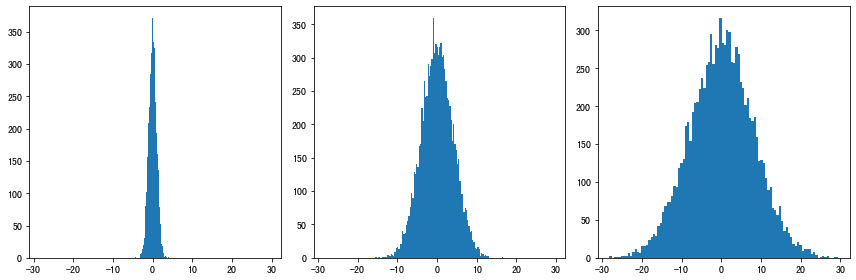

In [116]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, tight_layout=True)
n_bins=100
axs[0].hist(a1, bins=n_bins);
axs[1].hist(a2, bins=n_bins);
axs[2].hist(a3, bins=n_bins);
# 标准差越大，图像越宽

`standard_normal`标准正态分布（就是`normal`默认均值和标准差的情况），除了size，还多了dtype和out，这些参数的含义不再赘述。

`multivarite_normal`多变量正态分布将一维正态分布推广到高维。参数包括：

- mean：N维分布的均值，是N维空间中的坐标，表示最有可能生成的样本位置
- cov：分布的协方差矩阵，必须是对称且半正定的，表示两个变量一起变化的水平
- size：如果为None，则生成N个，否则生成`shape+(N,)`个
- check_valid：检查协方差矩阵是不是半正定的，默认warn，可选warn，raise和ignore
- tol：检查协方差矩阵中的奇异值时的公差。cov在检查前加倍。默认1e-8
- method：计算因子矩阵A（`A@A.T = cov`），默认svd（最慢），cholesky最快但不够鲁棒，eigh使用特征分解速度介于二者之间

In [187]:
(
    rng.multivariate_normal([0,0], [[1,0],[0,100]]).shape,
    rng.multivariate_normal([0,0], [[1,0],[0,100]], 3).shape,
    rng.multivariate_normal([0,0], [[1,0],[0,100]], (3, 4)).shape
)

((2,), (3, 2), (3, 4, 2))

### 高斯相关

`lognormal`对数正态分布，接受均值mean和标准差sigma。

$$
p(x) = \frac{1}{\sigma x \sqrt{2\pi}}
e^{(-\frac{(ln(x)-\mu)^2}{2\sigma^2})}
$$

如果`log(x)`满足正态分布，则x满足对数分布。

`laplace`拉普拉斯分布，接受位置参数loc和尺度参数scale，与高斯分布类似，在峰部更尖，在尾部更平坦。

$$
(x; \mu, \lambda) = \frac{1}{2\lambda}
                               \exp\left(-\frac{|x - \mu|}{\lambda}\right)
                               $$

`rayleigh`瑞利分布，参数scale表示标准差。

$$
P(x;scale) = \frac{x}{scale^2}e^{\frac{-x^2}{2 \cdotp scale^2}}
$$

当一个随机二维向量的两个分量呈现独立的、有相同方差、均值为0的正态分布时，向量的模呈瑞利分布。

`gumbel`耿贝尔分布需指定loc（中心参数μ和展宽参数σ）。

$$
p(x) = \frac{e^{-(x - \mu)/ \beta}}{\beta} e^{ -e^{-(x - \mu)/\beta}}\\
={\displaystyle {\frac {1}{\beta }}e^{-(z+e^{-z})}}\\
{\displaystyle z={\frac {x-\mu }{\beta }}}\\
$$

`standard_cauchy`标准柯西分布（物理学上交洛伦兹分布）。

$$
P(x; x_0, \gamma) = \frac{1}{\pi \gamma \bigl[ 1+(\frac{x-x_0}{\gamma})^2 \bigr] }
$$

标准柯西分布下，γ=1，x0=0。概率密度函数可化简为：

$$
P(x;0,1) = \frac{1}{\pi \bigl[ 1+x^2 \bigr] }
$$

在研究假设正态性的假设检验时，查看检验对来自柯西分布的数据的执行情况是一个很好的指标。因为柯西分布看起来像高斯分布，但尾巴更重。

`vonmises`冯·米塞思分布是一种圆上的连续概率分布，参数mu表示中心mode，kappa是浓度的度量，如果kappa=0表示分布是均匀的，很小时接近均匀分布，如果kappa很大，分布会在角度μ处变得非常集中。

$$
p(x) = \frac{e^{\kappa cos(x-\mu)}}{2\pi I_0(\kappa)}
$$

I_0是0阶修正的贝塞尔（Bassel）函数。

`wald`逆高斯分布，scale（参数λ）趋近于无穷大时，分布更像高斯分布。

$$
P(x;mean,scale) = \sqrt{\frac{scale}{2\pi x^3}}e^\frac{-scale(x-mean)^2}{2\cdotp mean^2x}
$$

`triangular`三角分布，需指定下限left、上限right和众数mode。

$$
P(x;l, m, r) = \begin{cases}
          \frac{2(x-l)}{(r-l)(m-l)}& \text{for $l \leq x \leq m$},\\
          \frac{2(r-x)}{(r-l)(r-m)}& \text{for $m \leq x \leq r$},\\
          0& \text{otherwise}.
          \end{cases}
$$

三角分布常用于定义不明确的问题，其中潜在的分布未知，但存在一些关于极限和众数的知识。

### 离散分布

`binomial`是二项分布，参数包括：n和p，n是试验次数，p是成功概率。n=1时是伯努利分布。

n次实验得到k次成功的概率：

$$
{\displaystyle f(k,n,p)=\Pr(X=k)={n \choose k}p^{k}(1-p)^{n-k}}
$$

In [73]:
# 丢10次硬币，正面向上的结果
rng.binomial(10, 0.5)

5

`multinomial`多项式分布是二项分布的推广，把二项推广到多种状态就是多项分布。参数包括试验次数n和各种结果的概率分布（和必须为1）。

$$
{\displaystyle {\begin{aligned}f(x_{1},\ldots ,x_{k};n,p_{1},\ldots ,p_{k})&{}=\Pr(X_{1}=x_{1}{\text{ and }}\dots {\text{ and }}X_{k}=x_{k})\\&{}={\begin{cases}{\displaystyle {n! \over x_{1}!\cdots x_{k}!}p_{1}^{x_{1}}\times \cdots \times p_{k}^{x_{k}}},\quad &{\text{when }}\sum _{i=1}^{k}x_{i}=n\\\\0&{\text{otherwise,}}\end{cases}}\end{aligned}}}
$$

更多参见：[Multinomial distribution - Wikipedia](https://en.wikipedia.org/wiki/Multinomial_distribution)

In [136]:
# 比如丢一个骰子20次
# 结果表示每个点数出现的次数
rng.multinomial(20, [1/6] * 6)

array([4, 6, 2, 1, 3, 4])

`negative_binomial`负二项分布（或帕斯卡分布），参数n表示成功次数，p表示成功概率。

$$
f(k;n,p) = \frac{\Gamma(n+k)}{k!\Gamma(n)}p^{n}(1-p)^{k}\\
\frac{\Gamma(n+k)}{N!\Gamma(n)} = \binom{k+n-1}{k}
$$

与二项分布的区别是，二项分布是固定总次数n的独立实验中，成功次数k的分布；而负二项分布是所有到n次成功时即终止的独立试验中，失败次数k的分布。即成功次数n，失败次数k。



更多参见：[Negative binomial distribution - Wikipedia](https://en.wikipedia.org/wiki/Negative_binomial_distribution#:~:text=In%20probability%20theory%20and%20statistics,failures%20(denoted%20r)%20occur.)

`poisson`泊松分布也是比较常见的，它是一种离散分布，是二项分布的极限。参数lam表示参数λ。

$$
f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
$$

泊松分布长与计数过程相联系，比如某一时段网站点击量等。

泊松分布也可以作为二项分布的一种近似（泊松定理），当n趋近于无穷大时，二项分布的极限为泊松分布。

更多参见：[Poisson distribution - Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution#:~:text=In%20probability%20theory%20and%20statistics,time%20since%20the%20last%20event.)

`geometric`几何分布需指定成功概率p。

如果每次试验的成功概率是 p，那么 k 次试验中，第 k 次才得到成功的概率是：

$$
f(k) = (1 - p)^{k - 1} p
$$

`hypergeometric`超几何分布需指定：正确选择的方法数ngood，错误选择的方法数nbad和采样数量，nsample<=ngood+nbad。

N个样本，g个满足条件，b个不满足，从N个中抽出n个，x满足条件的概率：

$$
P(x) = \frac{\binom{g}{x}\binom{b}{n-x}}{\binom{N}{n}}\\
g=\text{good}, b=\text{bad}
$$

更多参见：[Hypergeometric distribution - Wikipedia](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

`multivariate_hypergeometric`多元超几何分布，从N个不同类型的集合中随机不替换选择nsample个样本。参数包括：

- colors：每个类型在集合中的数量
- nsample：采样的数量
- method：生成算法，marginals（默认）或count。在某些情况下（比如colors包括相对小的数字），count方法比marginals快。


$$
f(x)=\frac{\left(\begin{array}{c}
D \\
x
\end{array}\right)\left(\begin{array}{c}
N-D \\
n-x
\end{array}\right)}{\left(\begin{array}{c}
N \\
n
\end{array}\right)}
$$


[Multivariate Hypergeometric distribution | Vose Software](https://www.vosesoftware.com/riskwiki/MultivariateHypergeometricdistribution.php#:~:text=The%20Multivariate%20Hypergeometric%20distribution%20is%20an%20array%20distribution%2C%20in%20this,%2C%20French%2C%20and%20Canadian)

In [171]:
colors = [3,2,1,4]
nsample = 4

In [172]:
# 从一组分别有 3 2 1 4 个不同类别的集合中选择4个
rng.multivariate_hypergeometric(colors, nsample)

array([0, 1, 1, 2])

In [174]:
rng.multivariate_hypergeometric(colors, nsample, method="count")

array([2, 1, 0, 1])

count方法与下面的等价：

In [149]:
choices = np.repeat(np.arange(len(colors)), colors)
choices

array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3])

In [154]:
selection = rng.choice(choices, nsample, replace=False)
selection

array([2, 1, 1, 0])

In [155]:
# 0 1 2 3 分别出现的「次数」
variate = np.bincount(selection, minlength=len(colors))
variate

array([1, 2, 1, 0])

marginals其实是重复请求单变量超几何分布采样器：

In [160]:
colors, nsample

([3, 2, 1, 4], 4)

In [158]:
variate = np.zeros(len(colors), dtype=np.int64)
# 每次采样后剩下的数
remaining = np.cumsum(colors[::-1])[::-1]
remaining

array([10,  7,  5,  4])

In [161]:
for i in range(len(colors) - 1):
    if nsample < 1:
        break
    variate[i] = rng.hypergeometric(colors[i], remaining[i+1], nsample)
    nsample -= variate[i]
variate[-1] = nsample
variate

array([2, 0, 0, 2])

### 指对数相关

`power`幂律分布，接受输入参数a。

$$
P(x; a) = ax^{a-1}, 0 \le x \le 1, a>0
$$

幂律分布正好是帕累托的倒数，也可以看作是Beta分布的一个特例。生活中很多现象都呈现出幂律分布，比如城市规模和收入、物种的觅食模式、大部分语言的用词频率等。

`pareto`帕累托分布，可以从Lomax分布中获得。参数a为形状参数，是概率分布参数族中的一种数值参数，既不是位置参数，也不是尺度参数。

$$
p(x) = \frac{am^a}{x^{a+1}}
$$


帕累托分布是幂律概率分布，在真实世界中大量存在（经济学外称为布拉德福分布）。


更多详见：[Pareto distribution - Wikipedia](https://en.wikipedia.org/wiki/Pareto_distribution)

`zipf`齐夫定律（也称为zeta分布）：一个单词出现的频率与它在频率表里的排名成反比。参数a表示

$$
p(k) = \frac{k^{-a}}{\zeta(a)}
$$

齐夫定律被作为任何与幂定律概率分布有关的事物的参考。

`beta`Beta（或B）分布是狄利克雷分布的特殊形式，与gamma分布有关。参数包括：a和b，分别表示alpha和beta。

$$
f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
(1 - x)^{\beta - 1},\\
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}
                             (1 - t)^{\beta - 1} dt.
$$

`dirichlet`是狄利克雷分布，接受长度为k的序列浮点数作为分布的参数。

$$
{\displaystyle f(x_{1},\dots ,x_{K};\alpha _{1},\dots ,\alpha _{K})={\frac {1}{\mathrm {B} (\alpha )}}\prod _{i=1}^{K}x_{i}^{\alpha _{i}-1}}
$$

`gamma`分布包含以下参数：

- shape：gamma分布的k值
- scale：gamma分布的theta值，默认1.0

$$
p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}
$$

`exponential`是指数分布，参数为：

- scale：1/beta，默认1.0

$$
f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})
$$


`weibull`韦伯分布，参数a表示shape，是可靠性分析和寿命检验的理论基础。

$$
p(x) = \frac{a}{\lambda}(\frac{x}{\lambda})^{a-1}e^{-(x/\lambda)^a}
$$

当a=1时退化为指数分布。

`logseries`对数分布也叫对数级数分布，参数p表示概率。

$$
P(k) = \frac{-p^k}{k \ln(1-p)}
$$

详见：[Logarithmic distribution - Wikipedia](https://en.wikipedia.org/wiki/Logarithmic_distribution)

`logistic`逻辑分布也叫增长分布，接受位置参数loc和尺度参数scale。

$$
P(x) = \frac{e^{-(x-\mu)/s}}{s(1+e^{-(x-\mu)/s})^2}
$$

### 检验相关

`chisquare`卡方分布需指定一个或一组浮点数，表示自由度的数量。

$$
p(x) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}
                 x^{k/2 - 1} e^{-x/2}
$$

`noncentral_chisquare`非中心卡方分布，参数除了卡方分布的自由度外，还有一个nonc参数表示非中心参数λ。

$$
P(x;df,nonc) = \sum^{\infty}_{i=0} \frac{e^{-nonc/2}(nonc/2)^{i}}{i!} P_{Y_{df+2i}}(x)
$$

Y_q是自由度为q的卡方分布。

`f`F分布包含两个参数：dfnum是分子的自由度，dfden是分母的自由度：

$$
{\begin{aligned}f(x;d_{1},d_{2})&={\frac  {{\sqrt  {{\frac  {(d_{1}\,x)^{{d_{1}}}\,\,d_{2}^{{d_{2}}}}{(d_{1}\,x+d_{2})^{{d_{1}+d_{2}}}}}}}}{x\,{\mathrm  {B}}\!\left({\frac  {d_{1}}{2}},{\frac  {d_{2}}{2}}\right)}}\\&={\frac  {1}{{\mathrm  {B}}\!\left({\frac  {d_{1}}{2}},{\frac  {d_{2}}{2}}\right)}}\left({\frac  {d_{1}}{d_{2}}}\right)^{{{\frac  {d_{1}}{2}}}}x^{{{\frac  {d_{1}}{2}}-1}}\left(1+{\frac  {d_{1}}{d_{2}}}\,x\right)^{{-{\frac  {d_{1}+d_{2}}{2}}}}\end{aligned}}
$$

更多详见：[F-distribution - Wikipedia](https://en.wikipedia.org/wiki/F-distribution)

`noncentral_f`非中心F分布比F分布多了一个nonc参数，表示非中心参数λ。

$$
p(f)=\sum \limits _{{k=0}}^{\infty }{\frac  {e^{{-\lambda /2}}(\lambda /2)^{k}}{B\left({\frac  {\nu _{2}}{2}},{\frac  {\nu _{1}}{2}}+k\right)k!}}\left({\frac  {\nu _{1}}{\nu _{2}}}\right)^{{{\frac  {\nu _{1}}{2}}+k}}\left({\frac  {\nu _{2}}{\nu _{2}+\nu _{1}f}}\right)^{{{\frac  {\nu _{1}+\nu _{2}}{2}}+k}}f^{{\nu _{1}/2-1+k}}\\
B(x,y)={\frac  {\Gamma (x)\Gamma (y)}{\Gamma (x+y)}}.
$$

更多详见：[Noncentral F-distribution - Wikipedia](https://en.wikipedia.org/wiki/Noncentral_F-distribution)

`standard_t`是学生t分布，参数df为自由度。


$$
P(x, df) = \frac{\Gamma(\frac{df+1}{2})}{\sqrt{\pi df} \Gamma(\frac{df}{2})}\Bigl( 1+\frac{x^2}{df} \Bigr)^{-(df+1)/2}
$$

主要用于检验是否属于正态分布，以文档中女性卡路里摄入为例：

In [101]:
# 11 个女性日卡路里摄入
intake = np.array([5260., 5470, 5640, 6180, 6390, 
                   6515, 6805, 7515, 7515, 8230, 8770])

上面的结果是否系统地偏离了推荐的7725KJ？我们需要先来一个零假设：即假设没有偏差，替代假设是存在正面或负面影响，是一个双尾的分布。

11个值对应10个自由度，显著水平设为95%，计算标准差：

In [103]:
np.std(intake, ddof=1)

1142.1232221373727

In [107]:
# T统计量
t = (np.mean(intake) - 7725) / \
(np.std(intake, ddof=1) / np.sqrt(len(intake)))
t 

-2.8207540608310198

In [112]:
# 生成学生t分布（自由度10）
s = rng.standard_t(10, 10000)

In [113]:
# 计算p值，远小于0.05，所以拒绝原假设，认为它们是有偏差的
np.sum(np.abs(t) < np.abs(s)) / len(s)

0.0185

## 小结

## 参考

- [Random Generator — NumPy v1.24.dev0 Manual](https://numpy.org/devdocs/reference/random/generator.html)